### <b><span style='color:#F1C40F'>|</span> Home task</b>

- Choose any store from the initial dataset
- Check the presence of nans and fill them
- Make a forecast for 30, 180, 270, 365 days ahead
- Perform model evaluation

In [325]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## <b><span style='color:#F1C40F'>|</span> Data Cleaning and Preprocessing</b>

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [327]:
df.duplicated()
df.drop_duplicates(inplace=True)

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [328]:
df = df.dropna(subset=['Postal Code'])
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [329]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df.rename(columns={'Ship Date': 'date'}, inplace=True)
df.rename(columns={'Sales': 'sales'}, inplace=True)

df['date']

0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: date, Length: 9789, dtype: datetime64[ns]

In [330]:
df.drop(columns=["Row ID",'Segment', 'Postal Code', 'Order ID', "Order Date",'Ship Mode', 'Customer ID', 'Customer Name', 'City', 'State', 'Country', 'Sub-Category', 'Product Name'],inplace=True)
df.head()

,date,Region,Product ID,Category,sales
0,2017-11-11,South,FUR-BO-10001798,Furniture,261.9600
1,2017-11-11,South,FUR-CH-10000454,Furniture,731.9400
2,2017-06-16,West,OFF-LA-10000240,Office Supplies,14.6200
3,2016-10-18,South,FUR-TA-10000577,Furniture,957.5775
4,2016-10-18,South,OFF-ST-10000760,Office Supplies,22.3680


In [331]:
def preprocess_data(df:pd.DataFrame) -> pd.DataFrame:
    df.date = pd.to_datetime(df.date)
    df['day_of_week'] = df['date'].dt.day_name()
    return df

df = preprocess_data(df)
df.head()

,date,Region,Product ID,Category,sales,day_of_week
0,2017-11-11,South,FUR-BO-10001798,Furniture,261.9600,Saturday
1,2017-11-11,South,FUR-CH-10000454,Furniture,731.9400,Saturday
2,2017-06-16,West,OFF-LA-10000240,Office Supplies,14.6200,Friday
3,2016-10-18,South,FUR-TA-10000577,Furniture,957.5775,Tuesday
4,2016-10-18,South,OFF-ST-10000760,Office Supplies,22.3680,Tuesday


In [332]:
# Extracting the columns that should come first
first_columns = ['date', 'sales', 'day_of_week']

# Extracting the remaining columns
remaining_columns = [col for col in df.columns if col not in first_columns]

df = df[first_columns + remaining_columns]
df

,date,sales,day_of_week,Region,Product ID,Category
0,2017-11-11,261.9600,Saturday,South,FUR-BO-10001798,Furniture
1,2017-11-11,731.9400,Saturday,South,FUR-CH-10000454,Furniture
2,2017-06-16,14.6200,Friday,West,OFF-LA-10000240,Office Supplies
3,2016-10-18,957.5775,Tuesday,South,FUR-TA-10000577,Furniture
4,2016-10-18,22.3680,Tuesday,South,OFF-ST-10000760,Office Supplies
...,...,...,...,...,...,...
9795,2017-05-28,3.7980,Sunday,Central,OFF-BI-10003429,Office Supplies
9796,2016-01-17,10.3680,Sunday,East,OFF-AR-10001374,Office Supplies
9797,2016-01-17,235.1880,Sunday,East,TEC-PH-10004977,Technology
9798,2016-01-17,26.3760,Sunday,East,TEC-PH-10000912,Technology


In [333]:
def sum_sales_per_day(df: pd.DataFrame) -> pd.DataFrame:
    day_level_df = df.groupby(['date', 'day_of_week']).agg({'sales': 'sum'}).reset_index()
    return day_level_df

day_level_df = sum_sales_per_day(df)
day_level_df

,date,day_of_week,sales
0,2015-01-07,Wednesday,29.2280
1,2015-01-08,Thursday,307.5000
2,2015-01-10,Saturday,4374.8800
3,2015-01-12,Monday,106.6940
4,2015-01-13,Tuesday,40.5440
...,...,...,...
1321,2019-01-01,Tuesday,2390.1548
1322,2019-01-02,Wednesday,1545.6240
1323,2019-01-03,Thursday,569.2740
1324,2019-01-04,Friday,344.2240


In [334]:
import plotly.express as px

fig = px.line(day_level_df, x='date', y=["sales"], markers=True, title="Store sales")
fig.show()

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [335]:
fig = px.box(day_level_df, x='day_of_week', y="sales", color="day_of_week",
             boxmode="overlay", points='all')
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
    width=700,
    height=700,
    title='Weekdays sales distribution',
)

In [336]:
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(day_level_df[:30].set_index('date')['sales'].dropna()) #autolag = 'AIC', regression = 'n')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("P-Value:", adftest[1])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")

ADF Test Results
Null Hypothesis: The series has an Unit Root
P-Value: 2.6242286240763065e-06
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary


In [337]:
# replace Zero values on NaN
day_level_df["sales"] = day_level_df["sales"].mask(day_level_df["sales"] == float(0), None)
day_level_df.head()

,date,day_of_week,sales
0,2015-01-07,Wednesday,29.228
1,2015-01-08,Thursday,307.500
2,2015-01-10,Saturday,4374.880
3,2015-01-12,Monday,106.694
4,2015-01-13,Tuesday,40.544


In [338]:
# load holidays event
event_df = pd.read_csv('holidays_events.csv')
event_df = preprocess_data(event_df)

event_df.head()

,date,type,locale,locale_name,description,transferred,day_of_week
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,Friday
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Sunday
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,Thursday
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,Saturday
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,Saturday


In [339]:
# merge sales data to look at the
event_df['date'] = pd.to_datetime(event_df['date'])

day_level_df[day_level_df['sales'].isna()].merge(
    event_df[["date", "description"]],
    how="left"
)

,day_of_week,sales,date,description


In [340]:
def simple_moving_average(data, N):
    SMA = []
    for i in range(N-1, len(data)):
        total = sum([data[j] for j in range(i-N+1, i+1)])
        SMA.append(total/N)
    return np.array(SMA)

In [341]:
# Calculate Simple Moving Average
window_size = 30
MA_dataset = day_level_df.copy()
# train, test = train_day_sales_df[:-window_size], train_day_sales_df[-window_size:]
MA_dataset['MA_score'] = MA_dataset['sales'].rolling(window=window_size).mean()

# Plot actual and forecasted data
fig = px.line(MA_dataset, x='date', y=["sales", "MA_score"], markers=True, title="MA forecast")

# Show plot
fig.show()

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [342]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# model evaluation
def evaluate_forecasting_model(actual_values:pd.Series, predicted_values:pd.Series, round_nbr:int=2) -> None:
    mape = mean_absolute_percentage_error(
        actual_values,
        predicted_values
    )
    mae = mean_absolute_error(
        actual_values,
        predicted_values
    )
    mse = mean_squared_error(
        actual_values,      
        predicted_values
    )

    print(f"MAE - {round(mae, round_nbr)}")
    print(f"MSE - {round(mse, round_nbr)}")
    print(f"MAPE - {round(mape, round_nbr)}")

evaluate_forecasting_model(
    actual_values=MA_dataset[-window_size:]['sales'],
    predicted_values=MA_dataset[-window_size:]['MA_score']
)

MAE - 1817.84
MSE - 4272003.51
MAPE - 4.37


In [343]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric, add_changepoints_to_plot

In [344]:
# preprocess data to needed format
fbp_set = day_level_df[['date', 'sales']]
fbp_set.rename(columns={"date": "ds", "sales":"y"}, inplace=True)
fbp_set.fillna(0, inplace=True)
fbp_set.head()

C:\Users\sviat\AppData\Local\Temp\ipykernel_29388\2386417696.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sviat\AppData\Local\Temp\ipykernel_29388\2386417696.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2015-01-07,29.228
1,2015-01-08,307.500
2,2015-01-10,4374.880
3,2015-01-12,106.694
4,2015-01-13,40.544


In [345]:
# split dataframe on train and test
window = 30
train, test = fbp_set[:-window], fbp_set[-window:]

In [346]:
# init and fit the model
m = Prophet()
m.fit(train)

15:17:59 - cmdstanpy - INFO - Chain [1] start processing
15:18:00 - cmdstanpy - INFO - Chain [1] done processing


In [347]:
# Create Future dates
future_sales = m.make_future_dataframe(periods=30)

# Predict sales
forecast = m.predict(future_sales)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-07,1234.653895,-1358.402542,3862.116580
1,2015-01-08,1308.426397,-1426.972333,3872.068721
2,2015-01-10,1248.264038,-1238.344015,3852.679663
3,2015-01-12,1076.573295,-1260.876122,3690.696046
4,2015-01-13,375.684231,-1987.733501,2811.724960


In [348]:
# display components
plot_components_plotly(m, forecast, figsize=(1000, 300))

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalid

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



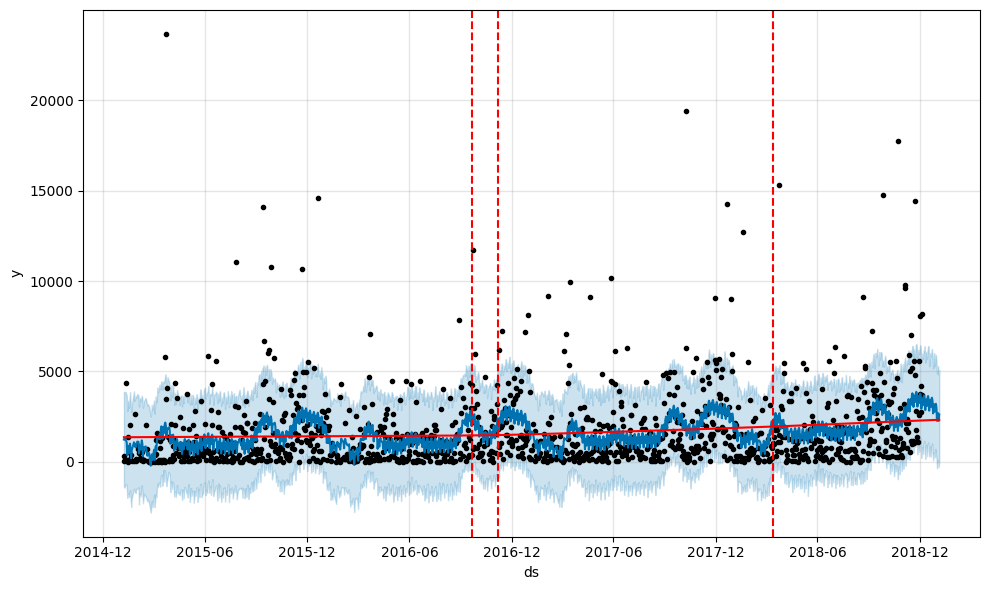

In [349]:
# plot changepoint duting time series data
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [350]:
# merge test set with forecasted values
benchmark_df = test.merge(forecast[["ds", "yhat"]], on="ds", how="left")

# Plot actual and forecasted data
fig = px.line(benchmark_df, x='ds', y=["y", "yhat"], markers=True, title="Prophet forecast")
fig.show()

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [351]:
evaluate_forecasting_model(
    actual_values=benchmark_df['y'],
    predicted_values=benchmark_df['yhat'],
    round_nbr=3
)

MAE - 1776.308
MSE - 4387581.59
MAPE - 4.608


## <b><span style='color:#F1C40F'>|</span>Future dates 180</b>

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalid

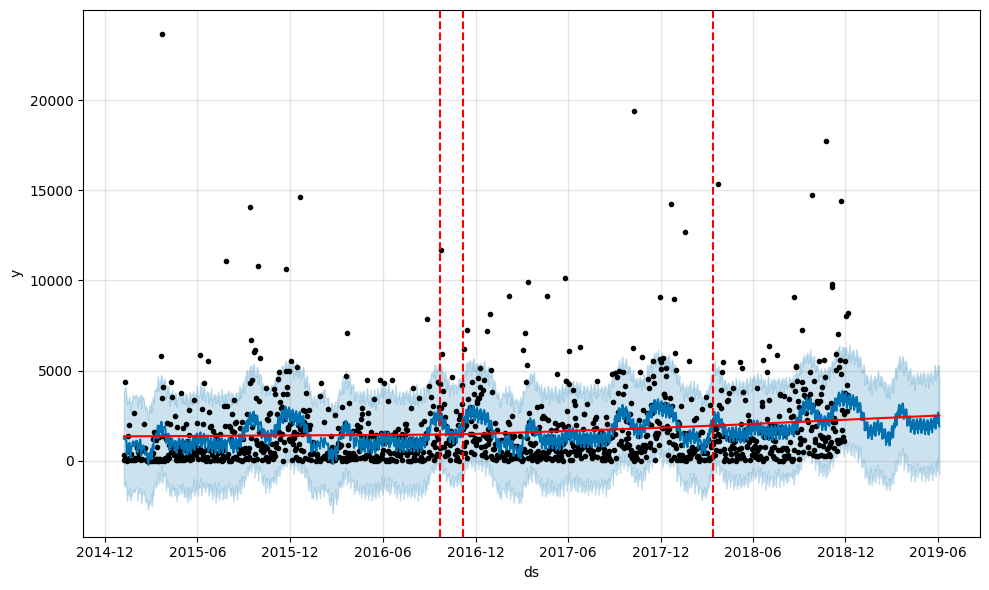

In [352]:
future_sales = m.make_future_dataframe(periods=180)
forecast = m.predict(future_sales)
plot_components_plotly(m, forecast, figsize=(1000, 300))
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [353]:
test = fbp_set[-180:]
benchmark_df = test.merge(forecast[["ds", "yhat"]], on="ds", how="left")

In [354]:
fig = px.line(benchmark_df, x='ds', y=["y", "yhat"], markers=True, title="Prophet forecast")
fig.show()

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [355]:
evaluate_forecasting_model(
    actual_values=benchmark_df['y'],
    predicted_values=benchmark_df['yhat'],
    round_nbr=3
)

MAE - 1805.58
MSE - 6779002.742
MAPE - 8.241


## <b><span style='color:#F1C40F'>|</span>Future dates 270</b>

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalid

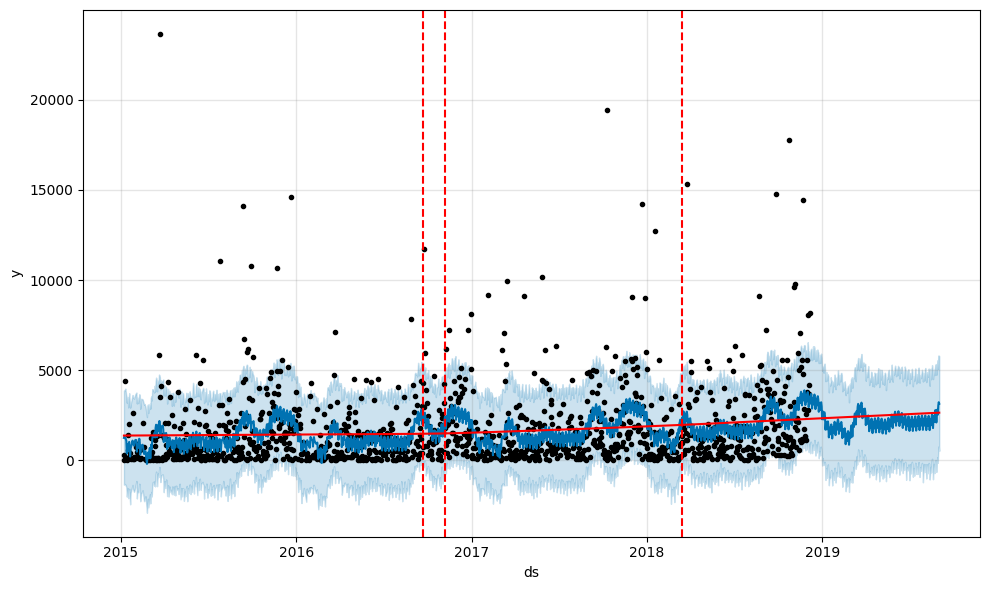

In [356]:
future_sales = m.make_future_dataframe(periods=270)
forecast = m.predict(future_sales)
plot_components_plotly(m, forecast, figsize=(1000, 300))
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [357]:
test = fbp_set[-270:]
benchmark_df = test.merge(forecast[["ds", "yhat"]], on="ds", how="left")

In [358]:
fig = px.line(benchmark_df, x='ds', y=["y", "yhat"], markers=True, title="Prophet forecast")
fig.show()

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [359]:
evaluate_forecasting_model(
    actual_values=benchmark_df['y'],
    predicted_values=benchmark_df['yhat'],
    round_nbr=3
)

MAE - 1606.575
MSE - 5270270.814
MAPE - 11.053


## <b><span style='color:#F1C40F'>|</span>Future dates 365</b>

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalid

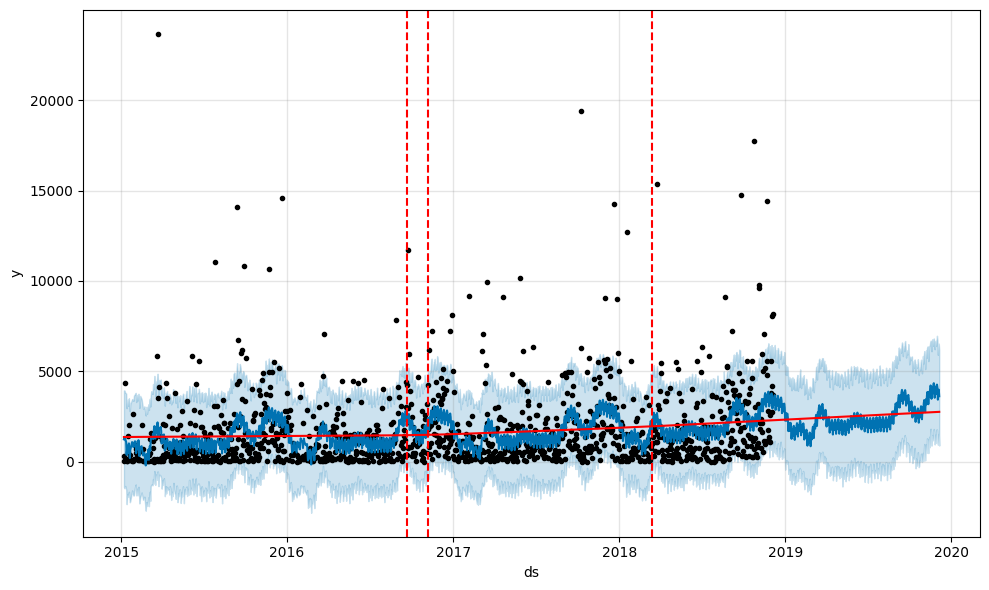

In [360]:
future_sales = m.make_future_dataframe(periods=365)
forecast = m.predict(future_sales)
plot_components_plotly(m, forecast, figsize=(1000, 300))
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [361]:
test = fbp_set[-365:]
benchmark_df = test.merge(forecast[["ds", "yhat"]], on="ds", how="left")

In [362]:
fig = px.line(benchmark_df, x='ds', y=["y", "yhat"], markers=True, title="Prophet forecast")
fig.show()

C:\Users\sviat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [363]:
evaluate_forecasting_model(
    actual_values=benchmark_df['y'],
    predicted_values=benchmark_df['yhat'],
    round_nbr=3
)

MAE - 1593.909
MSE - 5654831.096
MAPE - 9.944
